In [26]:
import pandas as pd
import folium
df = pd.read_csv("./gbsdata/rawdata2.csv")
df.head()
# a)Piirrä reitti kartalle käyttäen Folium-kirjastoa 

df = df[df['Satellites'] > 30]
df = df.reset_index(drop =True)

#Määritellään "karttapohja", eli kartan keskipiste
lat1 = df['Latitude (°)'].mean() #Latitudin keskiarvo
long1 = df['Longitude (°)'].mean() #Longitudin keskiarvo

#luodaan kartta
my_map = folium.Map(location = [lat1,long1], zoom_start=15)

#Piirretään reitti kartalle:
folium.PolyLine(df[['Latitude (°)','Longitude (°)']], color = 'red', weight = 3).add_to(my_map)
my_map.save('Sankivaara_18.11.2025.html')
# --- Folium-kartan vienti PNG:ksi ---
# vaatii selenium + chromedriver tai geckodriver
import io
from PIL import Image

png = my_map._to_png(5)  # 5 s odotus, että kartta latautuu
img = Image.open(io.BytesIO(png))
img.save("reitti_kartta.png")
print("Kartta tallennettu kuvana: reitti_kartta.png")

my_map

# b) Arvioi havaintojen luotettavuutta tarkastelemalla piirretyn reitin todenmukaisuutta.

vastaus_b = 'Piirretty karttakuva vastaa erittäin hyvin sitä reittiä, minkä kävin suksilla hiihtämästä. Filtteröinti suodattaa' \
            ' suodattaa pois lenkin aloituksen, jolloin gbs-data on selkeästi ollu epätarkkana, kunnes saa reitistä kiinni.'
print(vastaus_b)

Kartta tallennettu kuvana: reitti_kartta.png
Piirretty karttakuva vastaa erittäin hyvin sitä reittiä, minkä kävin suksilla hiihtämästä. Filtteröinti suodattaa suodattaa pois lenkin aloituksen, jolloin gbs-data on selkeästi ollu epätarkkana, kunnes saa reitistä kiinni.


Itse en näe juurikaan karttakuvassa näitä havaintojen epätarkuuksia, tässä datassa näkyy jonkin verran.


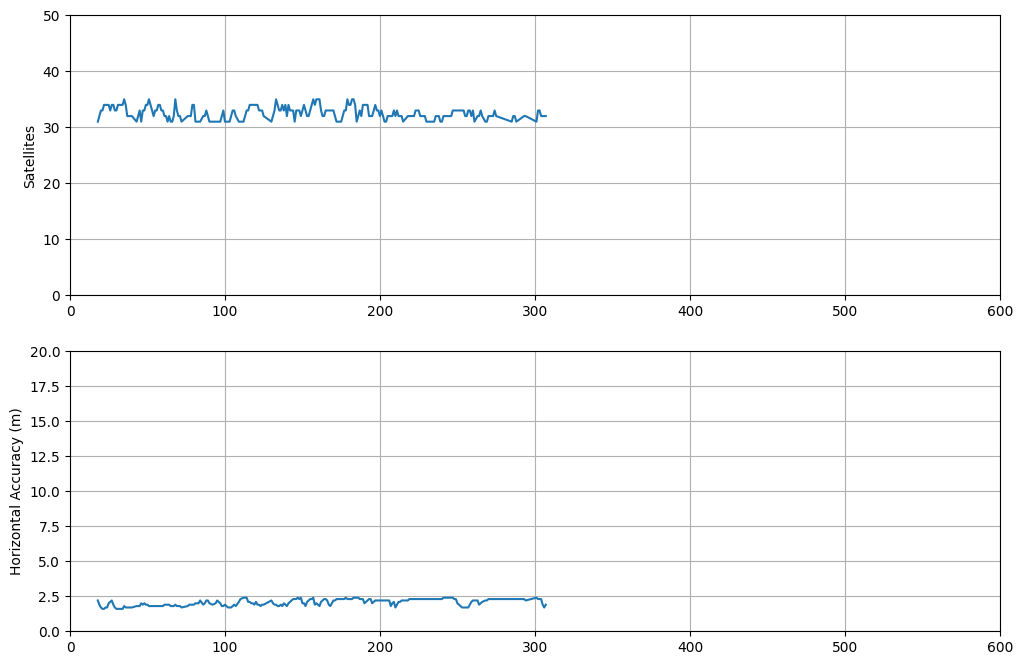

In [29]:
# c)Tarkastele datasta sateliittien määrää (toimii vain Androidilla) ja havaintojen epätarkkuutta. 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(df['Time (s)'],df['Satellites'])
plt.ylabel('Satellites')
plt.axis([0,600,0,50])
plt.grid()
plt.subplot(2,1,2)
plt.plot(df['Time (s)'],df['Horizontal Accuracy (m)'])
plt.ylabel('Horizontal Accuracy (m)')
plt.axis([0,600,0,20])
plt.grid()

Vastaus_c = "Itse en näe juurikaan karttakuvassa näitä havaintojen epätarkuuksia, tässä datassa näkyy jonkin verran."
print (Vastaus_c)

In [30]:
# d) Laske kuljettu matka käyttäen Haversinen kaavaa.
#Lasketaan matka käyttäen Haversinen kaava
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371
    return c * r

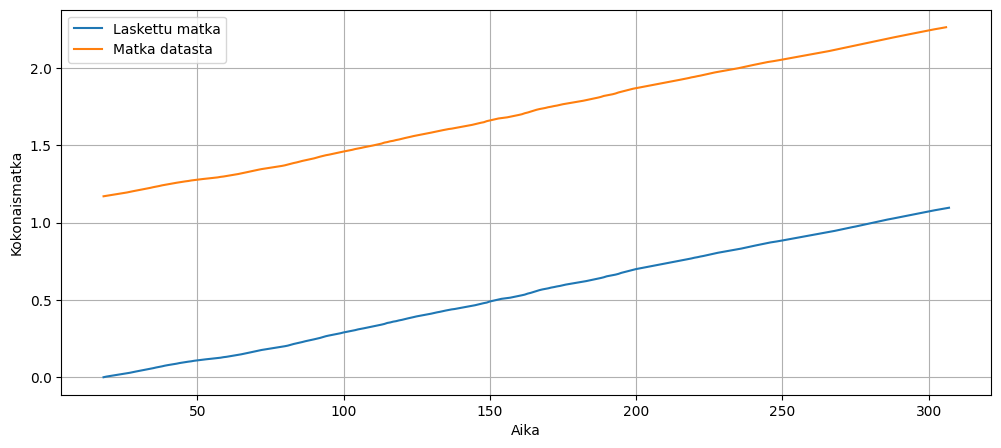

,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites,Distance_calc,total_distance
0,17.932771,64.980737,25.695358,30.496482,48.0,2.738322,167.490005,1.169896,2.2,16.200001,31,0.000000,0.000000
1,18.932771,64.980700,25.695377,30.996443,48.5,3.223705,194.070007,1.172887,1.9,13.500000,32,0.004167,0.004167
2,19.932771,64.980673,25.695368,30.496418,48.0,3.203631,200.529999,1.175848,1.7,14.100000,33,0.002991,0.007158
3,20.932771,64.980648,25.695347,30.296397,47.8,3.190763,201.809998,1.178401,1.6,13.900000,33,0.002961,0.010119
4,21.932771,64.980628,25.695320,29.996381,47.5,3.155762,215.399994,1.181685,1.6,14.000000,34,0.002553,0.012672


In [31]:
import numpy as np
df['Distance_calc'] = np.zeros(len(df))

#lasketaan väimatka havaintopisteiden välillä käyttäen For-luuppia
for i in range(len(df)-1):
    lon1 = df['Longitude (°)'][i]
    lon2 = df['Longitude (°)'][i+1]
    lat1 = df['Latitude (°)'][i]
    lat2 = df['Latitude (°)'][i+1]
    df.loc[i+1,'Distance_calc'] = haversine(lon1, lat1, lon2, lat2)

#Lasketaan kokonaismatka mittapisteiden välisestä matkasta
df['total_distance'] = df['Distance_calc'].cumsum()
plt.figure(figsize=(12,5))
plt.plot(df['Time (s)'],df['total_distance'])
plt.plot(df['Time (s)'],df['Distance (km)'])
plt.ylabel('Kokonaismatka')
plt.xlabel('Aika')
plt.legend(['Laskettu matka','Matka datasta'])
plt.grid()
plt.show()
df.head()

In [34]:
import matplotlib.pyplot as plt

# c) satelliitit + epätarkkuus - kuva talteen
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(df['Time (s)'], df['Satellites'])
plt.ylabel('Satellites')
plt.axis([0,600,0,50])
plt.grid()

plt.subplot(2,1,2)
plt.plot(df['Time (s)'], df['Horizontal Accuracy (m)'])
plt.ylabel('Horizontal Accuracy (m)')
plt.axis([0,600,0,20])
plt.grid()

plt.tight_layout()
plt.savefig("satellites_accuracy.png", dpi=200)
plt.close()


# d) matka-kuva talteen
plt.figure(figsize=(12,5))
plt.plot(df['Time (s)'], df['total_distance'])
plt.plot(df['Time (s)'], df['Distance (km)'])
plt.ylabel('Kokonaismatka (km)')
plt.xlabel('Aika (s)')
plt.legend(['Laskettu matka','Matka datasta'])
plt.grid()
plt.tight_layout()
plt.savefig("distance_plot.png", dpi=200)
plt.close()

from fpdf import FPDF

pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)

pdf.add_page()
pdf.set_font("Helvetica", "B", 16)
pdf.cell(0, 10, "Fysiikka viikkotehtävä 3", ln=True)

# a) teksti + karttatiedosto
pdf.ln(3)
pdf.set_font("Helvetica", "B", 12)
pdf.cell(0, 8, "a) Reitti kartalla (Folium)", ln=True)

pdf.ln(2)
pdf.image("reitti_kartta.png", w=180)


# b) luotettavuus
pdf.ln(3)
pdf.set_font("Helvetica", "B", 12)
pdf.cell(0, 8, "b) Luotettavuuden arviointi", ln=True)

pdf.set_font("Helvetica", "", 12)
pdf.multi_cell(0, 6, vastaus_b)

# c) satelliitit + epätarkkuus
pdf.ln(3)
pdf.set_font("Helvetica", "B", 12)
pdf.cell(0, 8, "c) Satelliittien määrä ja epätarkkuus", ln=True)

pdf.set_font("Helvetica", "", 12)
pdf.multi_cell(0, 6, Vastaus_c)

pdf.ln(2)
pdf.image("satellites_accuracy.png", w=180)

# d) matka
pdf.ln(3)
pdf.set_font("Helvetica", "B", 12)
pdf.cell(0, 8, "d) Kuljetun matkan laskenta (Haversine)", ln=True)

pdf.image("distance_plot.png", w=180)

total_km = df['total_distance'].iloc[-1]
pdf.ln(2)
pdf.set_font("Helvetica", "", 12)
pdf.cell(0, 8, f"Laskettu kokonaismatka: {total_km:.2f} km", ln=True)
pdf.cell(0, 8, f"Tämä lasku vastaa aikalailla samaa, ", ln=True)
pdf.cell(0, 8, f"mitä Polar sykemittarikin antaa matkaksi.", ln=True)
pdf.cell(0, 8, f"Polarin mittari antaa 1,18 km, joten alusta taisi jäädä se 80 m suunnilleen tallentamatta.", ln=True)
# Tallennus
pdf.output("GPS_raportti.pdf")
print("PDF tallennettu: GPS_raportti.pdf")


/var/folders/y4/xsy_h8g14ql73xm25qxzv04h0000gn/T/ipykernel_16653/1126758580.py:41: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 10, "Fysiikka viikkotehtävä 3", ln=True)
/var/folders/y4/xsy_h8g14ql73xm25qxzv04h0000gn/T/ipykernel_16653/1126758580.py:46: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 8, "a) Reitti kartalla (Folium)", ln=True)
/var/folders/y4/xsy_h8g14ql73xm25qxzv04h0000gn/T/ipykernel_16653/1126758580.py:55: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 8, "b) Luotettavuuden arviointi", ln=True)
/var/folders/y4/xsy_h8g14ql73xm25qxzv04h0000gn/T/ipykernel_16653/1126758580.py:63: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YP

PDF tallennettu: GPS_raportti.pdf


/var/folders/y4/xsy_h8g14ql73xm25qxzv04h0000gn/T/ipykernel_16653/1126758580.py:81: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 8, f"Laskettu kokonaismatka: {total_km:.2f} km", ln=True)
/var/folders/y4/xsy_h8g14ql73xm25qxzv04h0000gn/T/ipykernel_16653/1126758580.py:82: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 8, f"Tämä lasku vastaa aikalailla samaa, ", ln=True)
/var/folders/y4/xsy_h8g14ql73xm25qxzv04h0000gn/T/ipykernel_16653/1126758580.py:83: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 8, f"mitä Polar sykemittarikin antaa matkaksi.", ln=True)
/var/folders/y4/xsy_h8g14ql73xm25qxzv04h0000gn/T/ipykernel_16653/1126758580.py:84: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead o